In [2]:
#SCRAPING THE SKYTRAX WEBSITE FOR AIRLINE REVIEWS 
import requests 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from bs4 import BeautifulSoup 
from wordcloud import WordCloud

In [3]:
skytrax_URL = "https://www.airlinequality.com/airline-reviews/british-airways" 

pages = 10 
size_of_page = 100 

reviews = []
Aircraft = [] 
seat_class = [] 
route = [] 
recommend = []  

data = pd.DataFrame() 

for j in range(1,pages+1):
    
    
    ratings = []
    category = []

    print(f"scrapping page{j}")

    pg_url = f"{skytrax_URL}/page/{j}/?sortby=post_date%3ADesc&pagesize={size_of_page}"

    response = requests.get(pg_url) 

    cont = response.content
    parsed_cont = BeautifulSoup(cont,'html.parser')

    for beta in parsed_cont.find_all("div", {"class":"text_content"}) :
        reviews.append(beta.get_text()) 


    for beta2 in parsed_cont.find_all("div",{"class":"review-stats"}) :
        for beta3 in beta2.find_all("td",{"class": "review-value"}):
            ratings.append(beta3.get_text())

        recom = ratings[-1] 
        ratings = ratings[:-1] 

        for beta4 in beta2.find_all('td',{'class':'review-rating-stars stars'}):
            beta5 = len(beta4.find_all('span',{'class':'star fill'}))
            ratings.append(beta5) 
        ratings.append(recom)  


        for beta6 in beta2.find_all('td',{'class': 'review-rating-header'}):
            category.append(beta6.get_text()) 



        dict_data = pd.DataFrame([ratings], columns = category)
        
        data = pd.concat([data, dict_data] , ignore_index = True) 

        ratings = [] 
        category = [] 

    print(f"   ---> {len(reviews)} total reviews") 

data["reviews"] = reviews 

print(data) 


    

scrapping page1
   ---> 100 total reviews
scrapping page2
   ---> 200 total reviews
scrapping page3
   ---> 300 total reviews
scrapping page4
   ---> 400 total reviews
scrapping page5
   ---> 500 total reviews
scrapping page6
   ---> 600 total reviews
scrapping page7
   ---> 700 total reviews
scrapping page8
   ---> 800 total reviews
scrapping page9
   ---> 900 total reviews
scrapping page10
   ---> 1000 total reviews
    Type Of Traveller        Seat Type  \
0        Solo Leisure    Economy Class   
1        Solo Leisure  Premium Economy   
2        Solo Leisure   Business Class   
3      Couple Leisure    Economy Class   
4        Solo Leisure    Economy Class   
..                ...              ...   
995      Solo Leisure   Business Class   
996      Solo Leisure   Business Class   
997    Couple Leisure   Business Class   
998          Business   Business Class   
999    Family Leisure  Premium Economy   

                                          Route      Date Flown  Seat Com

In [7]:
data.sample(5) 

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Aircraft,Inflight Entertainment,Wifi & Connectivity,reviews
661,Family Leisure,Business Class,Larnaca to London Heathrow,October 2021,2.0,4.0,2.0,3.0,3,yes,A321,NaN,3.0,✅ Trip Verified | Flight from Larnaca to LHR. ...
861,Family Leisure,Economy Class,London to Mauritius,November 2019,1.0,4.0,1.0,1.0,2,no,Boeing 777,1.0,1.0,✅ Trip Verified | London to Mauritius. We are ...
651,Solo Leisure,Economy Class,Stockholm to London Heathrow,November 2021,1.0,5.0,1.0,1.0,2,no,A320,NaN,NaN,Not Verified | Check-in very slow. No app che...
276,Solo Leisure,Economy Class,Berlin to London,July 2023,5.0,5.0,3.0,4.0,5,yes,A320,NaN,5.0,✅ Trip Verified | Flight fine. In-line with c...
385,Solo Leisure,Economy Class,London Singapore,February 2023,3.0,5.0,5.0,5.0,4,yes,Boeing 787,4.0,NaN,✅ Trip Verified | Although it was a bit uncom...


In [8]:
data.to_csv("BritishAirways_Reviews.csv" , index = False) 

In [9]:
data = pd.read_csv("BritishAirways_Reviews.csv") 

In [10]:
data.shape

(1000, 14)

In [12]:
junk_text = ['✅ Trip Verified','Not Verified |'] 

for x in range(len(data['reviews'])):
    for y in junk_text:
        if y in data['reviews'][x]:
            data['reviews'] = data['reviews'].str.replace(y,'') 

In [13]:
data.sample(5) 

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Aircraft,Inflight Entertainment,Wifi & Connectivity,reviews
243,Family Leisure,Economy Class,London to Paris,August 2023,1.0,1.0,NaN,1.0,1,no,NaN,NaN,NaN,"Flight delayed by an hour, it happens, no bi..."
497,Solo Leisure,Economy Class,Accra to London,November 2021,NaN,NaN,NaN,1.0,1,no,NaN,NaN,NaN,| Refund process is non responsive I have be...
839,Solo Leisure,Business Class,London to Singapore,October 2019,4.0,5.0,5.0,5.0,5,yes,A380,1.0,1.0,London to Singapore. I was apprehensive abou...
238,Family Leisure,Economy Class,Delhi to Vancouver via London,December 2022,1.0,1.0,NaN,1.0,1,no,NaN,NaN,NaN,| 8 months have passed and still wasting my ...
356,Couple Leisure,Economy Class,London to Lanzarote,March 2023,3.0,2.0,NaN,2.0,3,no,A321,1.0,NaN,"Generally poor. Sent to gate on time, sat ma..."


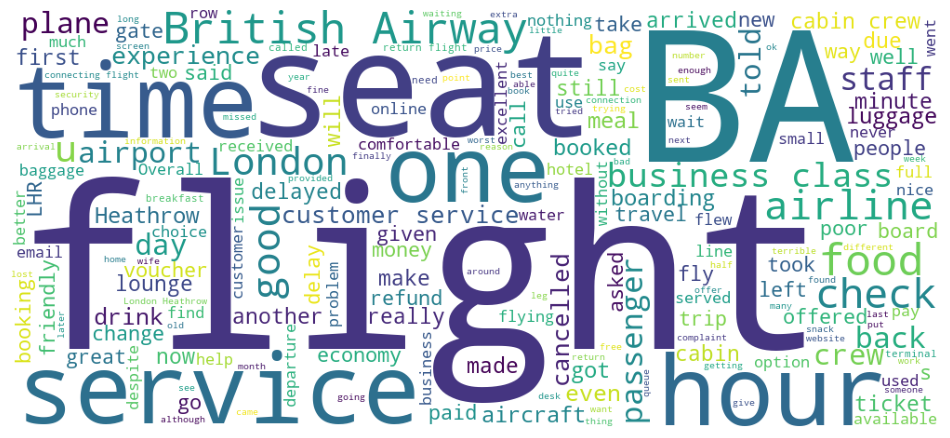

In [17]:
#Data Analysis using Wordcloud 

letter_cloud  = [] 

for i in data['reviews'] :
    g = i.split(' ') 
    for j in g : 
        letter_cloud.append(j)  

star_string = (" ").join(letter_cloud)  

word = WordCloud(width = 1000 , height = 450 , background_color = 'white').generate(star_string) 
plt.figure(figsize = (12,6) ) 
plt.imshow(word)  
plt.axis("off") 
plt.show() 



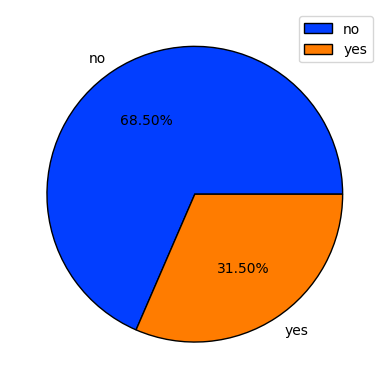

In [18]:
#Customer Satisfaction Analysis 

sat  = data.groupby('Recommended')['reviews'].count().reset_index() 

plt.pie(sat['reviews'], labels = sat['Recommended'] , autopct = '%.2f%%' , colors = sns.color_palette('bright'),
        wedgeprops = {'edgecolor':'k'})

plt.legend()
plt.show() 

In [4]:
#In Above Pie Chart 68.50% customers are dissatisfied from Airlines 

#Analysis of dissatisfied passengers 

df_passenger = data[data['Recommended']== 'no'] 
df_passenger.describe() 

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,597.000000,587.000000,482.000000,336.000000,627.000000,220.000000,684.000000
mean,2.093802,2.410562,1.869295,2.187500,1.768740,1.545455,1.500000
std,1.113332,1.316769,1.075880,1.218254,1.158016,0.980507,0.807179
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#Analysis of Food Served on board 

info  = df_passenger[df_passenger['reviews'].str.contains('money | refund & value')] 
info['reviews'].to_csv('aircraft.csv') 


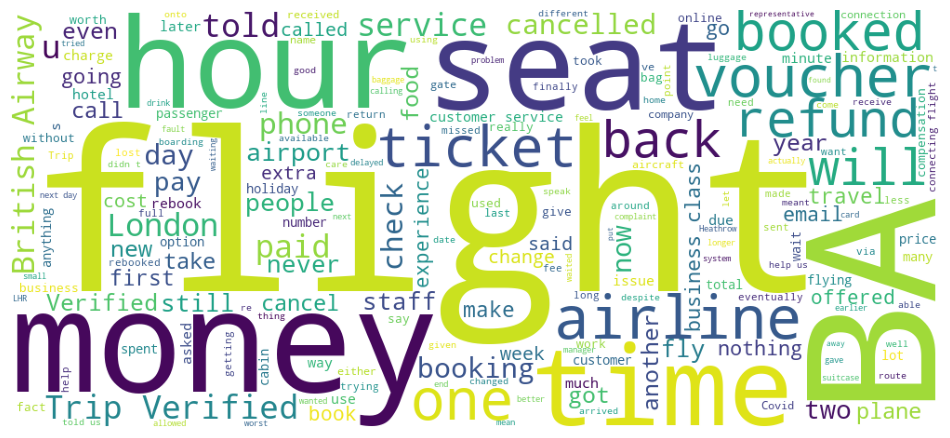

In [8]:
letter_cloud = [] 

for i in info['reviews'] :
    a = i.split(' ')  
    for x in a :
        letter_cloud.append(x)  

star_string = (" ").join(letter_cloud) 

word = WordCloud(width = 1000 , height = 450 , background_color = 'white').generate(star_string) 
plt.figure(figsize = (12,6) ) 
plt.imshow(word)  
plt.axis("off") 
plt.show() 




In [6]:
#Value for Money Analysis in British Airways 

info  = df_passenger[df_passenger['reviews'].str.contains('money | refund & value')] 
info['reviews'].to_csv('aircraft.csv') 

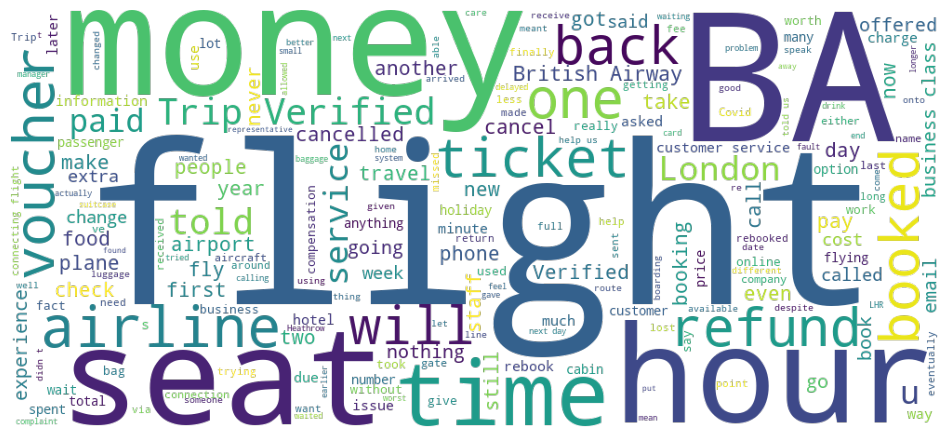

In [7]:
letter_cloud = [] 

for i in info['reviews'] :
    a = i.split(' ')  
    for x in a :
        letter_cloud.append(x)  

star_string = (" ").join(letter_cloud) 

word = WordCloud(width = 1000 , height = 450 , background_color = None, mode = 'RGBA' ).generate(star_string) 
plt.figure(figsize = (12,6) ) 
plt.imshow(word)  
plt.axis("off") 
plt.show() 